In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

<Axes: xlabel='DATE'>

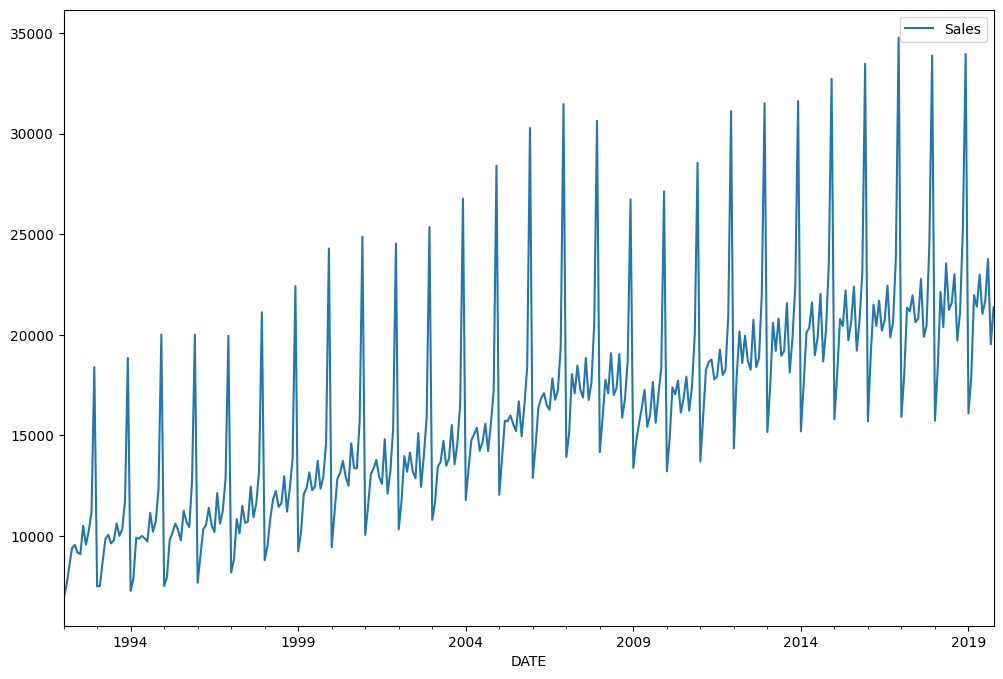

In [2]:
df = pd.read_csv('../DATA/MRTSSM448USN.csv', parse_dates=True, index_col='DATE')

df.columns = ['Sales']

df.plot(figsize=(12, 8))

In [ ]:
len(df)

334

In [4]:
len(df) - 18

316

In [5]:
test_size = 18
test_ind = len(df) - test_size

train = df[:test_ind]
test = df[test_ind:]

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train)

MinMaxScaler()

In [7]:
scaled_train = scaler.transform(train)

scaled_test = scaler.transform(test)

In [8]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 12
generator= TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [9]:
X,y = generator[0]

In [ ]:
# len(X[0])

Creating Model, Validation Generator and Evaluate Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

n_features = 1

model = Sequential()

model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

C:\Users\aashi\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [14]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

In [15]:
model.fit(generator, epochs=20, validation_data=validation_generator,callbacks=[early_stop])

Epoch 1/20


C:\Users\aashi\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


304/304 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0355 - val_loss: 0.0059
Epoch 2/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0224 - val_loss: 0.0024
Epoch 3/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0108 - val_loss: 8.8890e-04
Epoch 4/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0061 - val_loss: 0.0025
Epoch 5/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - val_loss: 2.2370e-04
Epoch 6/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022 - val_loss: 0.0049
Epoch 7/20
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - val_loss: 0.0014


<Axes: >

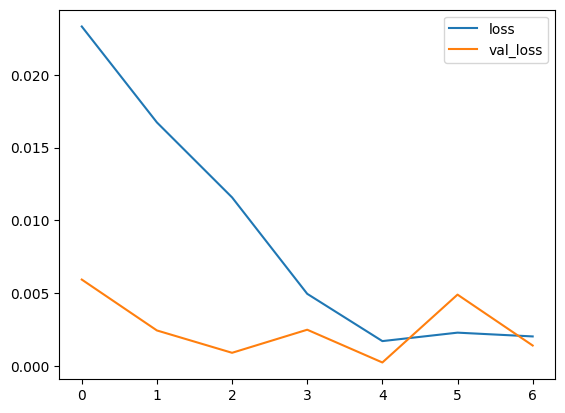

In [16]:
losses = pd.DataFrame(model.history.history)

losses.plot()

In [17]:
test_predictions = []
first_evaluation_batch = scaled_train[-length:]
current_batch = first_evaluation_batch.reshape((1, length, n_features))

# predicted_value = [[[99]]]
# np.append(current_batch[:,1:,:], [[[99]]], axis=1)
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [18]:
true_predictions = scaler.inverse_transform(test_predictions)

test['Predictions'] = true_predictions

C:\Users\aashi\AppData\Local\Temp\ipykernel_5800\2110937659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [19]:
test

,Sales,Predictions
DATE,,
2018-05-01,23552.0,22825.515634
2018-06-01,21234.0,21451.063181
2018-07-01,21584.0,21692.279154
2018-08-01,23012.0,23779.834265
2018-09-01,19713.0,20810.186181
2018-10-01,21128.0,21502.386540
2018-11-01,25289.0,26158.222296
2018-12-01,33954.0,38671.500291
2019-01-01,16096.0,16907.396218


<Axes: xlabel='DATE'>

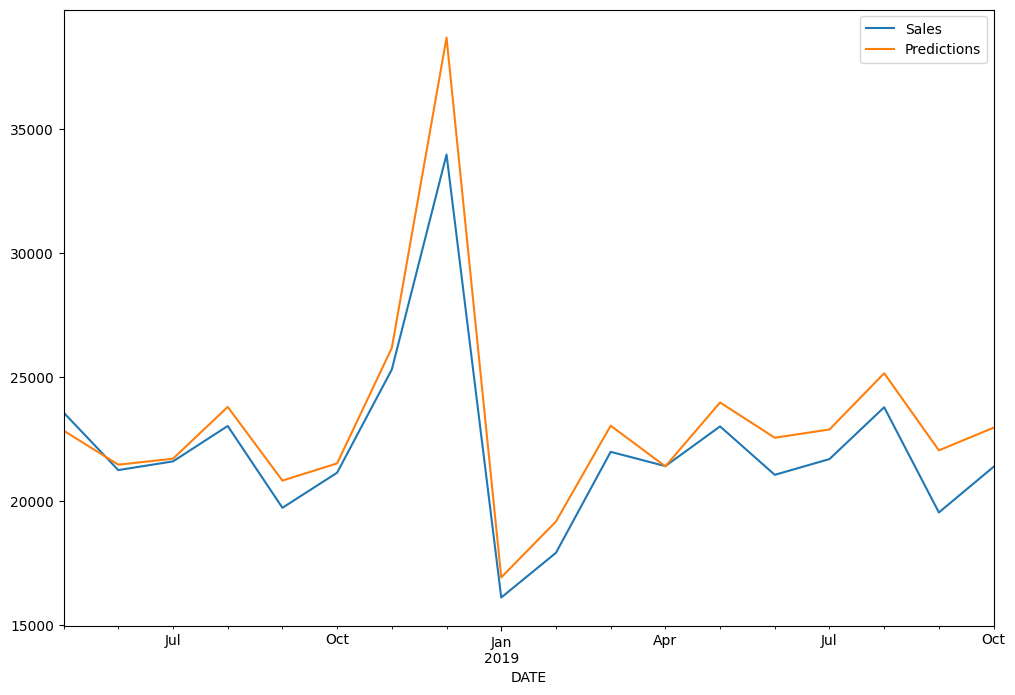

In [20]:
test.plot(figsize=(12,8))

In [22]:
full_scaler = MinMaxScaler()

scaled_full_data = full_scaler.fit_transform(df)

In [23]:
length = 12
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length=length, batch_size=1)

In [24]:
model = Sequential()

model.add(LSTM(100, activation='relu', input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

model.fit(generator, epochs=4)

Epoch 1/4


C:\Users\aashi\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\aashi\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


322/322 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0513
Epoch 2/4
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0174
Epoch 3/4
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0153
Epoch 4/4
322/322 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0043


In [25]:
forecast = []

periods = 12

first_evaluation_batch = scaled_train[-length:]
current_batch = first_evaluation_batch.reshape((1, length, n_features))

# predicted_value = [[[99]]]
# np.append(current_batch[:,1:,:], [[[99]]], axis=1)
for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred)

    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [26]:
forecast = scaler.inverse_transform(forecast)

In [27]:
forecast

array([[20925.01077509],
       [20034.92801493],
       [20235.4388544 ],
       [21668.55687988],
       [19654.4446345 ],
       [20175.27581847],
       [23496.46047032],
       [31294.57297909],
       [16373.5513649 ],
       [18157.17116666],
       [20789.43147194],
       [19590.2087636 ]])

In [28]:
forecast_index = pd.date_range(start='2019-11-01', periods = periods, freq="MS")

In [29]:
forecast_index

DatetimeIndex(['2019-11-01', '2019-12-01', '2020-01-01', '2020-02-01',
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [30]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])

(576.0, 611.0)

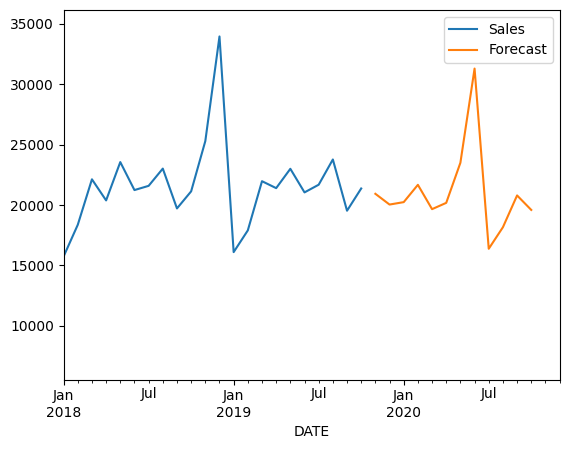

In [31]:
ax = df.plot()

forecast_df.plot(ax=ax)

plt.xlim('2018-01-01', '2020-12-01')